In [2]:
import pandas as pd
names = ['NA','user_id','movie_id','rating','timestamp','gender','age','occupation','zip','title','genres']
data2 = pd.read_table('genre_seperated.dat',sep='\t',header=None,names=names,engine='python')
data2 = data2.drop('NA', 1)
data2[:5]

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,2917,2355,2,971730180,M,25,0,60201,"Bug's Life, A (1998)",Animation
1,2917,2355,2,971730180,M,25,0,60201,"Bug's Life, A (1998)",Children's
2,2917,2355,2,971730180,M,25,0,60201,"Bug's Life, A (1998)",Comedy
3,2924,2355,4,971592069,F,18,4,94121,"Bug's Life, A (1998)",Animation
4,2924,2355,4,971592069,F,18,4,94121,"Bug's Life, A (1998)",Children's


q1. An aggregate of the movie ratings for each particular genre:

In [3]:
import numpy as np
agg_rating_by_genres = data2.groupby('genres').agg({'rating':[np.size,np.mean]})
agg_rating_by_genres

rating          
               size      mean
genres                       
Action       257457  3.491185
Adventure    133953  3.477257
Animation     43303  3.684895
Children's    72196  3.422087
Comedy       356590  3.522107
Crime         79541  3.708679
Documentary    7910  3.933123
Drama        354529  3.766332
Fantasy       36301  3.447371
Film-Noir     18261  4.075188
Horror        76386  3.215013
Musical       41533  3.665519
Mystery       40178  3.668102
Romance      147523  3.607465
Sci-Fi       157294  3.466521
Thriller     189680  3.570466
War           68527  3.893327
Western       20683  3.637770

q2. The top 5 highest ranked genre by women:

In [4]:
mean_rating_by_genres = data2.pivot_table('rating',index='genres',columns='gender',aggfunc='mean')
top_female_ratings = mean_rating_by_genres.sort_values(by='F',ascending=False)
top_female_ratings[:5]

gender,F,M
genres,,
Film-Noir,4.018087,4.092254
Documentary,3.946392,3.928811
War,3.893138,3.893375
Musical,3.809108,3.596332
Drama,3.765662,3.766589


q3. The top 5 highest ranked genre by men:

In [5]:
top_male_ratings = mean_rating_by_genres.sort_values(by='M',ascending=False)
top_male_ratings[:5]

gender,F,M
genres,,
Film-Noir,4.018087,4.092254
Documentary,3.946392,3.928811
War,3.893138,3.893375
Drama,3.765662,3.766589
Crime,3.689332,3.713720


For the next two questions, I will be using the original dataset instead of the one with genres separated, because the dataset of seperated genres contains a lot of duplication for ratings.

q4. A breakdown of the ratings of movie "Jurassic Park" by age.

In [6]:
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('ml-1m/users.dat', sep='::', header=None, names=unames, engine='python')

rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('ml-1m/ratings.dat', sep='::', header=None, names=rnames, engine='python')

mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('ml-1m/movies.dat', sep='::', header=None, names=mnames, engine='python')

data = pd.merge(pd.merge(ratings, users), movies)

jurassic_park = data['title'] == 'Jurassic Park (1993)'
data[jurassic_park].groupby('age').agg({'rating':[np.size,np.mean]})

rating          
      size      mean
age                 
1       89  3.808989
18     541  3.737523
25    1000  3.702000
35     518  3.795367
45     218  3.940367
50     193  3.766839
56     113  3.911504

q5. A function that given a user_id and movie_id , returns a list of user_ids for other users that rated the movie identified by the provided movie_id with the same score.

In [7]:
def findUserId(user_id, movie_id):
    rating = data[(data['movie_id'] == movie_id) & (data['user_id'] == user_id)]['rating']
    if len(rating) == 0:
        return pd.core.series.Series()
    res = data[(data['movie_id'] == movie_id) & (data['rating'] == rating[0]) & (data['user_id'] != user_id)]
    return res['user_id']

q6. Some other statistic, figure, data aggregate, or plot that you created using this dataset, along with a short description of what interesting observations you derived from it.

In [8]:
mean_rating_by_genres['diff'] = mean_rating_by_genres['M'] - mean_rating_by_genres['F']
mean_rating_by_genres

gender,F,M,diff
genres,,,
Action,3.490252,3.491386,0.001134
Adventure,3.512879,3.468125,-0.044753
Animation,3.744785,3.661336,-0.083449
Children's,3.572628,3.358998,-0.213630
Comedy,3.571955,3.503671,-0.068285
Crime,3.689332,3.713720,0.024388
Documentary,3.946392,3.928811,-0.017581
Drama,3.765662,3.766589,0.000927
Fantasy,3.513076,3.426603,-0.086473


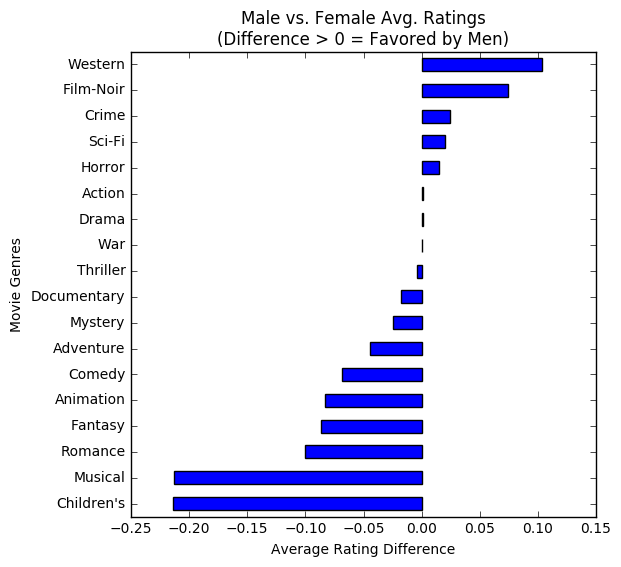

In [14]:
import matplotlib.pyplot as plt
disagreements = mean_rating_by_genres['diff']
disagreements.sort_values().plot(kind='barh',figsize=[6,6])
plt.title('Male vs. Female Avg. Ratings\n(Difference > 0 = Favored by Men)')
plt.ylabel('Movie Genres')
plt.xlabel('Average Rating Difference');
plt.show()

As shown in the graph above, men and women show similar rating in genres of Action, Drama and War. However, men favors Western and Film-Noir movies, while women favors Musical, Children's movies, romance, fantasy, and animation. From my own perspectives, it makes a lot sense to me that women favors children's movie, romance and animation movies. Yet, I don't quite understand why men favors western movie and why women and men rate war movies similarly.